# League of Legends WIN predictor

In [132]:
import numpy as np
import pandas as pd
import matplotlib as plt
import seaborn as sns
from sklearn.model_selection import train_test_split
from sklearn.neighbors import KNeighborsClassifier
from sklearn.preprocessing import StandardScaler
from sklearn.model_selection import GridSearchCV
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import accuracy_score, classification_report, ConfusionMatrixDisplay
from sklearn.naive_bayes import GaussianNB, BernoulliNB
from sklearn.linear_model import LogisticRegression
from sklearn.tree import DecisionTreeClassifier
from sklearn import naive_bayes
from sklearn import svm
from sklearn.ensemble import RandomForestClassifier

In [116]:
#import data

data= pd.read_csv(r"C:\Users\rayan\Desktop\Projects\League of Legends\Data\high_diamond_ranked_10min.csv")

In [117]:
data.head()

,gameId,blueWins,blueWardsPlaced,blueWardsDestroyed,blueFirstBlood,blueKills,blueDeaths,blueAssists,blueEliteMonsters,blueDragons,...,redTowersDestroyed,redTotalGold,redAvgLevel,redTotalExperience,redTotalMinionsKilled,redTotalJungleMinionsKilled,redGoldDiff,redExperienceDiff,redCSPerMin,redGoldPerMin
0,4519157822,0,28,2,1,9,6,11,0,0,...,0,16567,6.8,17047,197,55,-643,8,19.7,1656.7
1,4523371949,0,12,1,0,5,5,5,0,0,...,1,17620,6.8,17438,240,52,2908,1173,24.0,1762.0
2,4521474530,0,15,0,0,7,11,4,1,1,...,0,17285,6.8,17254,203,28,1172,1033,20.3,1728.5
3,4524384067,0,43,1,0,4,5,5,1,0,...,0,16478,7.0,17961,235,47,1321,7,23.5,1647.8
4,4436033771,0,75,4,0,6,6,6,0,0,...,0,17404,7.0,18313,225,67,1004,-230,22.5,1740.4


## Data Cleanup

In [118]:
#Check for missing values

missing_values = data.isnull().sum

In [119]:
column_names = data.columns.tolist()
column_names

['gameId',
 'blueWins',
 'blueWardsPlaced',
 'blueWardsDestroyed',
 'blueFirstBlood',
 'blueKills',
 'blueDeaths',
 'blueAssists',
 'blueEliteMonsters',
 'blueDragons',
 'blueHeralds',
 'blueTowersDestroyed',
 'blueTotalGold',
 'blueAvgLevel',
 'blueTotalExperience',
 'blueTotalMinionsKilled',
 'blueTotalJungleMinionsKilled',
 'blueGoldDiff',
 'blueExperienceDiff',
 'blueCSPerMin',
 'blueGoldPerMin',
 'redWardsPlaced',
 'redWardsDestroyed',
 'redFirstBlood',
 'redKills',
 'redDeaths',
 'redAssists',
 'redEliteMonsters',
 'redDragons',
 'redHeralds',
 'redTowersDestroyed',
 'redTotalGold',
 'redAvgLevel',
 'redTotalExperience',
 'redTotalMinionsKilled',
 'redTotalJungleMinionsKilled',
 'redGoldDiff',
 'redExperienceDiff',
 'redCSPerMin',
 'redGoldPerMin']

In [120]:
drop_columns = ["gameId", "blueFirstBlood",
                "blueEliteMonsters", "blueTotalGold", 
                "blueTotalExperience", "blueTotalMinionsKilled", 
                "blueTotalJungleMinionsKilled", "blueCSPerMin", 
                "blueGoldPerMin", "redFirstBlood", "redKills", 
                "redDeaths", "redAssists", "redEliteMonsters",
                "redTotalGold", "redTotalExperience", 
                "redTotalMinionsKilled", "redTotalJungleMinionsKilled", 
                "redGoldDiff", "redExperienceDiff", "redCSPerMin",
                "redGoldPerMin"]
#these columns are dropped as it is redundant information and is not required
#or that information has already been conveyed by a different variable

In [121]:
data_clean=data.drop(drop_columns,axis=1)
data_clean

,blueWins,blueWardsPlaced,blueWardsDestroyed,blueKills,blueDeaths,blueAssists,blueDragons,blueHeralds,blueTowersDestroyed,blueAvgLevel,blueGoldDiff,blueExperienceDiff,redWardsPlaced,redWardsDestroyed,redDragons,redHeralds,redTowersDestroyed,redAvgLevel
0,0,28,2,9,6,11,0,0,0,6.6,643,-8,15,6,0,0,0,6.8
1,0,12,1,5,5,5,0,0,0,6.6,-2908,-1173,12,1,1,1,1,6.8
2,0,15,0,7,11,4,1,0,0,6.4,-1172,-1033,15,3,0,0,0,6.8
3,0,43,1,4,5,5,0,1,0,7.0,-1321,-7,15,2,0,0,0,7.0
4,0,75,4,6,6,6,0,0,0,7.0,-1004,230,17,2,1,0,0,7.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
9874,1,17,2,7,4,5,1,0,0,7.2,2519,2469,46,3,0,0,0,6.8
9875,1,54,0,6,4,8,1,0,0,7.2,782,888,12,21,0,0,0,7.0
9876,0,23,1,6,7,5,0,0,0,7.0,-2416,-1877,14,0,1,0,0,7.4
9877,0,14,4,2,3,3,1,0,0,6.6,-839,-1085,66,4,0,0,0,7.2


In [122]:
data_clean.describe()

,blueWins,blueWardsPlaced,blueWardsDestroyed,blueKills,blueDeaths,blueAssists,blueDragons,blueHeralds,blueTowersDestroyed,blueAvgLevel,blueGoldDiff,blueExperienceDiff,redWardsPlaced,redWardsDestroyed,redDragons,redHeralds,redTowersDestroyed,redAvgLevel
count,9879.000000,9879.000000,9879.000000,9879.000000,9879.000000,9879.000000,9879.000000,9879.000000,9879.000000,9879.000000,9879.000000,9879.000000,9879.000000,9879.000000,9879.000000,9879.000000,9879.000000,9879.000000
mean,0.499038,22.288288,2.824881,6.183925,6.137666,6.645106,0.361980,0.187974,0.051422,6.916004,14.414111,-33.620306,22.367952,2.723150,0.413098,0.160036,0.043021,6.925316
std,0.500024,18.019177,2.174998,3.011028,2.933818,4.064520,0.480597,0.390712,0.244369,0.305146,2453.349179,1920.370438,18.457427,2.138356,0.492415,0.366658,0.216900,0.305311
min,0.000000,5.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,4.600000,-10830.000000,-9333.000000,6.000000,0.000000,0.000000,0.000000,0.000000,4.800000
25%,0.000000,14.000000,1.000000,4.000000,4.000000,4.000000,0.000000,0.000000,0.000000,6.800000,-1585.500000,-1290.500000,14.000000,1.000000,0.000000,0.000000,0.000000,6.800000
50%,0.000000,16.000000,3.000000,6.000000,6.000000,6.000000,0.000000,0.000000,0.000000,7.000000,14.000000,-28.000000,16.000000,2.000000,0.000000,0.000000,0.000000,7.000000
75%,1.000000,20.000000,4.000000,8.000000,8.000000,9.000000,1.000000,0.000000,0.000000,7.200000,1596.000000,1212.000000,20.000000,4.000000,1.000000,0.000000,0.000000,7.200000
max,1.000000,250.000000,27.000000,22.000000,22.000000,29.000000,1.000000,1.000000,4.000000,8.000000,11467.000000,8348.000000,276.000000,24.000000,1.000000,1.000000,2.000000,8.200000


In [123]:
data_clean.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 9879 entries, 0 to 9878
Data columns (total 18 columns):
 #   Column               Non-Null Count  Dtype  
---  ------               --------------  -----  
 0   blueWins             9879 non-null   int64  
 1   blueWardsPlaced      9879 non-null   int64  
 2   blueWardsDestroyed   9879 non-null   int64  
 3   blueKills            9879 non-null   int64  
 4   blueDeaths           9879 non-null   int64  
 5   blueAssists          9879 non-null   int64  
 6   blueDragons          9879 non-null   int64  
 7   blueHeralds          9879 non-null   int64  
 8   blueTowersDestroyed  9879 non-null   int64  
 9   blueAvgLevel         9879 non-null   float64
 10  blueGoldDiff         9879 non-null   int64  
 11  blueExperienceDiff   9879 non-null   int64  
 12  redWardsPlaced       9879 non-null   int64  
 13  redWardsDestroyed    9879 non-null   int64  
 14  redDragons           9879 non-null   int64  
 15  redHeralds           9879 non-null   i

## Data Exploration

To understand better the relationship of the variables with the BLUE WINNING, a grid is plotted and the hue is set to 'blueWins'. It is clear to see games where blue wins and what the distribution of the data is

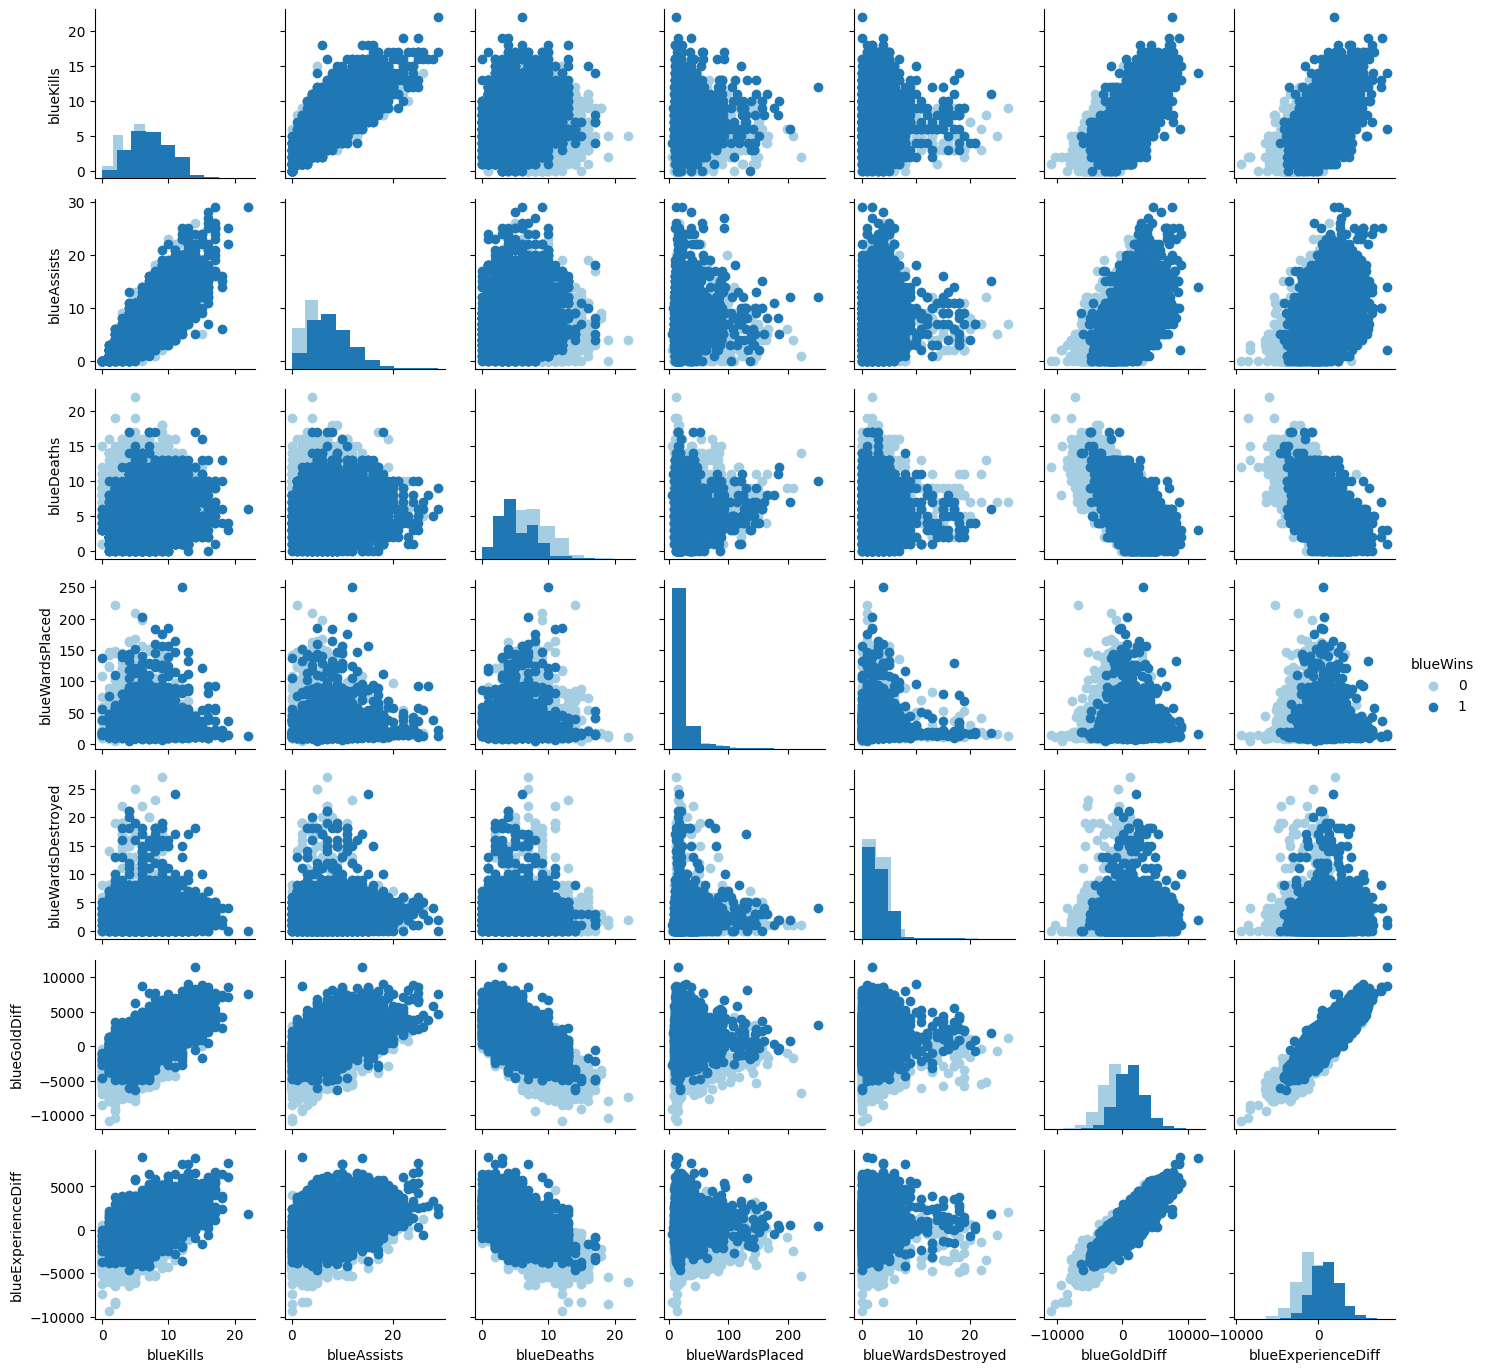

In [124]:
plot_variables = ['blueKills','blueAssists','blueDeaths',
       'blueWardsPlaced','blueWardsDestroyed','blueGoldDiff','blueExperienceDiff']
blue_pairgrid = sns.PairGrid(data = data_clean,vars = plot_variables,
                            hue = "blueWins",height = 2 , palette="Paired")
blue_pairgrid.map_diag(plt.pyplot.hist)
blue_pairgrid.map_offdiag(plt.pyplot.scatter)
blue_pairgrid.add_legend()

Lets see the correlation

<AxesSubplot: >

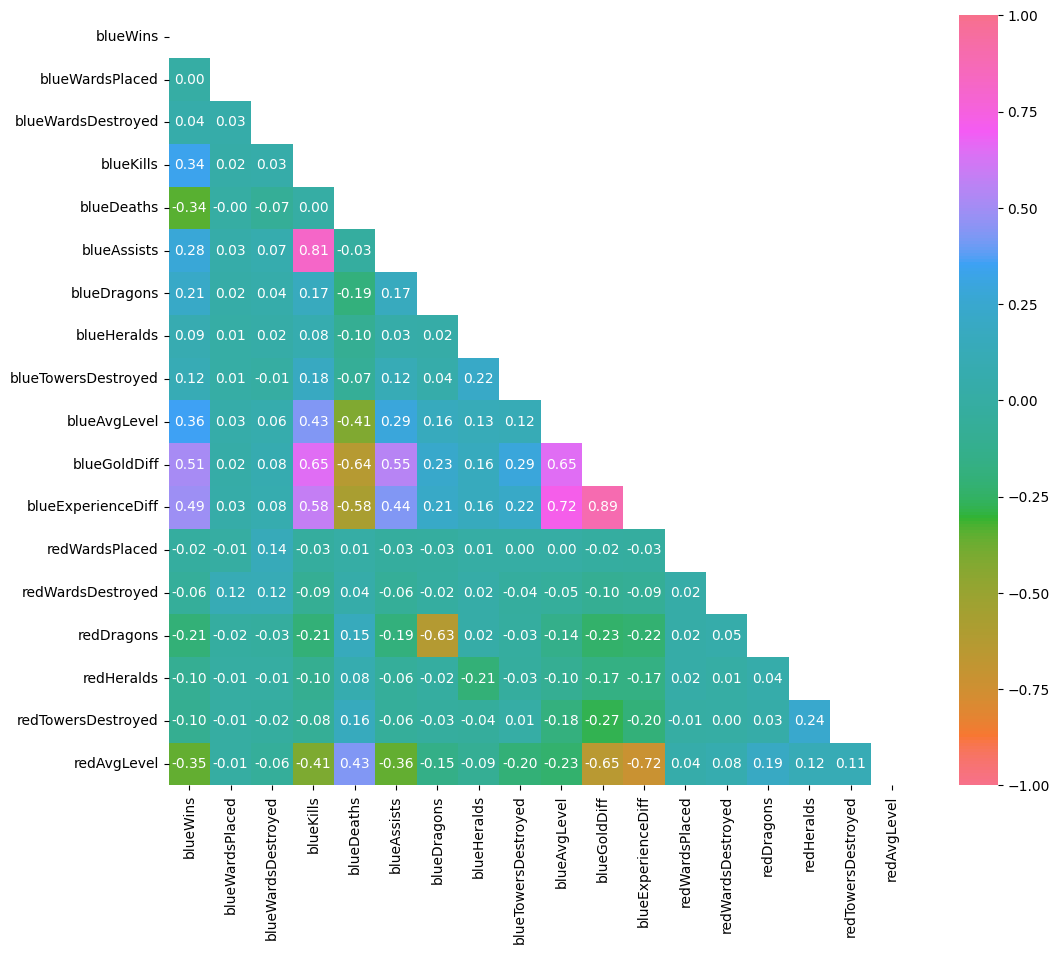

In [125]:
data_corr = data_clean.corr()
plt.pyplot.figure(figsize=(12, 10))
sns.heatmap(data_corr, 
            mask = np.triu(np.ones_like(data_corr, dtype = bool)), 
            vmin = -1, vmax = 1, fmt = ".2f", annot = True, 
            cmap = sns.color_palette("husl", as_cmap = True))

Lets see what variables have the highest correlation with blue winning the game

In [126]:
data_corr["blueWins"].sort_values(ascending=False)

blueWins               1.000000
blueGoldDiff           0.511119
blueExperienceDiff     0.489558
blueAvgLevel           0.357820
blueKills              0.337358
blueAssists            0.276685
blueDragons            0.213768
blueTowersDestroyed    0.115566
blueHeralds            0.092385
blueWardsDestroyed     0.044247
blueWardsPlaced        0.000087
redWardsPlaced        -0.023671
redWardsDestroyed     -0.055400
redHeralds            -0.097172
redTowersDestroyed    -0.103696
redDragons            -0.209516
blueDeaths            -0.339297
redAvgLevel           -0.352127
Name: blueWins, dtype: float64

There are some variables that have a negative correlation or a very low one, therefore we will drop all correlations between -0.2 and 0.2

In [128]:
#removed variables

remove = ['blueTowersDestroyed',
'blueHeralds',
'blueWardsDestroyed'   ,
'blueWardsPlaced' ,  
'redWardsPlaced'   ,
'redWardsDestroyed',
'redHeralds' ,
'redTowersDestroyed',
'redDragons']

data_clean = data_clean.drop(remove,axis=1)

### Now lets find outliers, as this data will not be suitable for model training and will be beneficial to remove

blueWins                 AxesSubplot(0.125,0.712609;0.168478x0.167391)
blueKills             AxesSubplot(0.327174,0.712609;0.168478x0.167391)
blueDeaths            AxesSubplot(0.529348,0.712609;0.168478x0.167391)
blueAssists           AxesSubplot(0.731522,0.712609;0.168478x0.167391)
blueDragons              AxesSubplot(0.125,0.511739;0.168478x0.167391)
blueAvgLevel          AxesSubplot(0.327174,0.511739;0.168478x0.167391)
blueGoldDiff          AxesSubplot(0.529348,0.511739;0.168478x0.167391)
blueExperienceDiff    AxesSubplot(0.731522,0.511739;0.168478x0.167391)
redAvgLevel               AxesSubplot(0.125,0.31087;0.168478x0.167391)
dtype: object

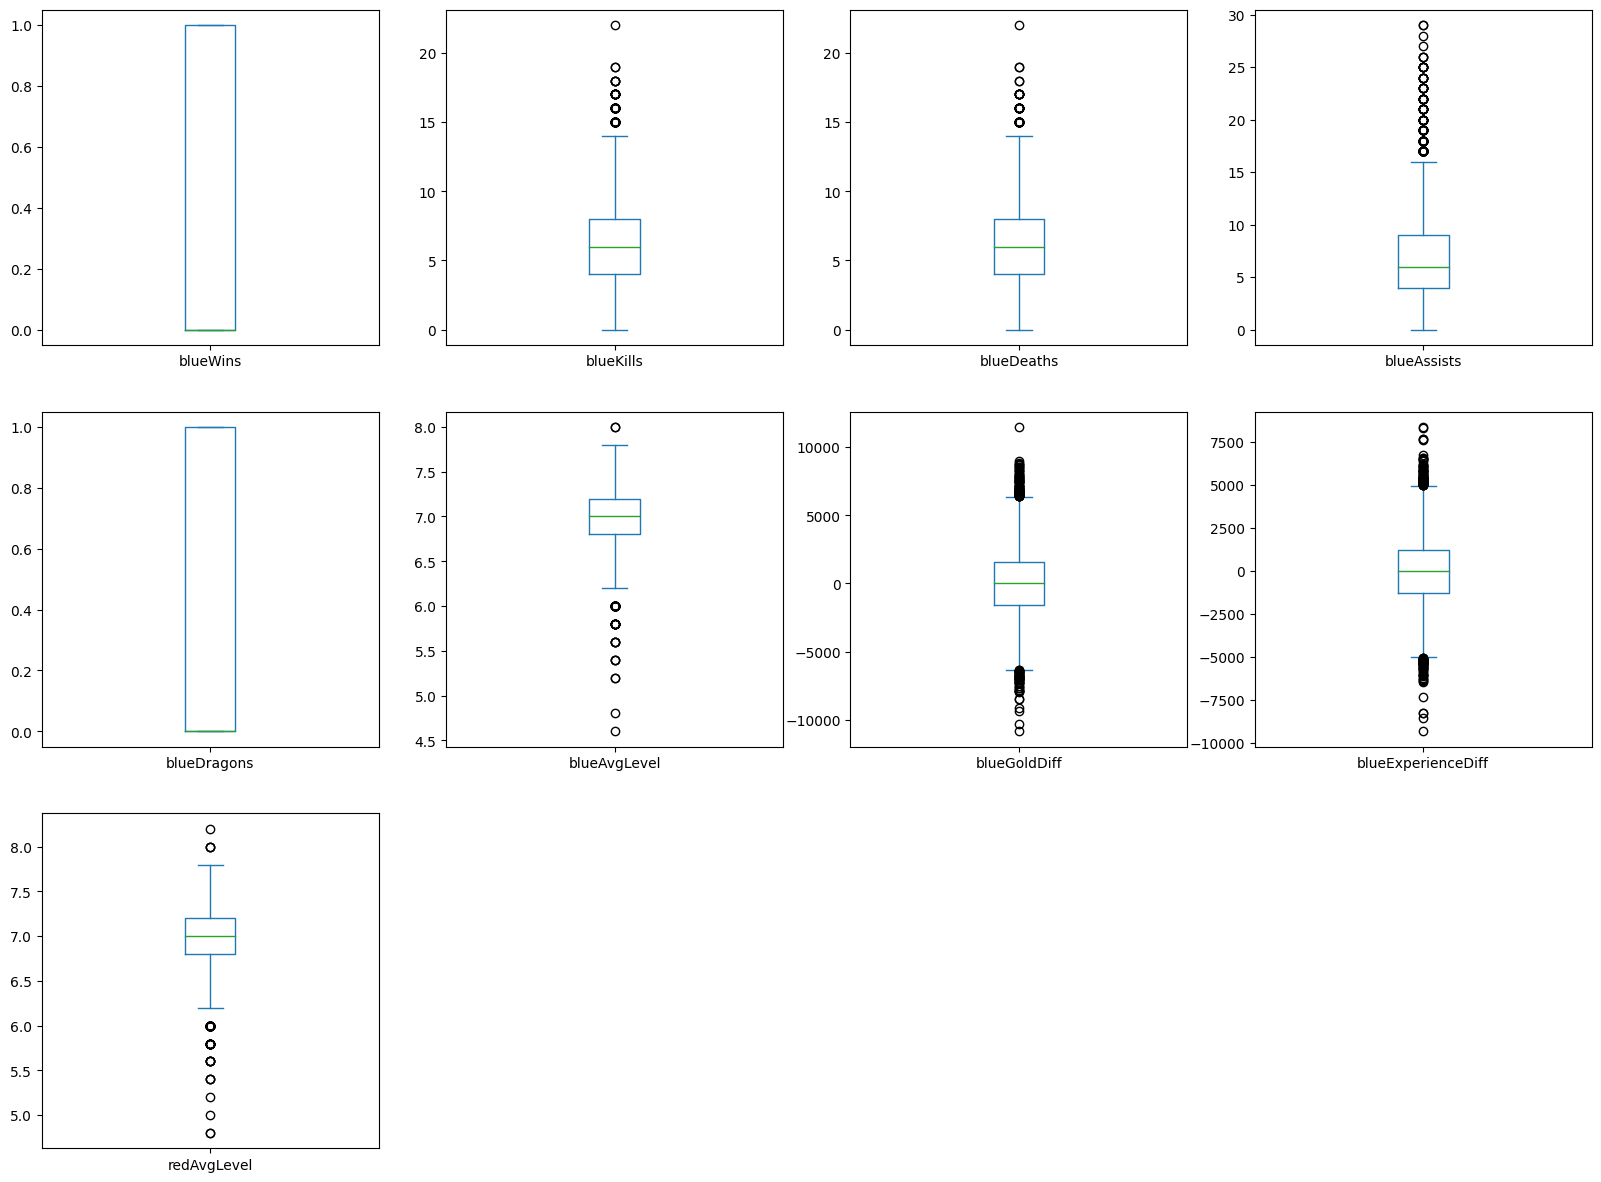

In [129]:
data_clean.plot(kind = "box", subplots = True, layout = (4, 4), figsize = (20, 20))

There are significant Outliers and they will need to be treated

In [130]:
data_clean["blueKills"] = data_clean["blueKills"].apply(lambda x: data_clean.blueKills.mean() if x > 14 else x)
data_clean["blueDeaths"] =data_clean ["blueDeaths"].apply(lambda x: data_clean.blueDeaths.mean() if x > 14 else x)
data_clean["blueAssists"] = data_clean["blueAssists"].apply(lambda x: data_clean.blueAssists.mean() if x > 16 else x)
data_clean["blueAvgLevel"] = data_clean["blueAvgLevel"].apply(lambda x: data_clean.blueAvgLevel.mean() if x < 6.25 or x > 7.75 else x)
data_clean["blueGoldDiff"] = data_clean["blueGoldDiff"].apply(lambda x: data_clean.blueGoldDiff.mean() if x < -6000 or x > 6000 else x)
data_clean["blueExperienceDiff"] = data_clean["blueExperienceDiff"].apply(lambda x: data_clean.blueExperienceDiff.mean() if x < -4800 or x > 4800 else x)
data_clean["redAvgLevel"] = data_clean["redAvgLevel"].apply(lambda x: data_clean.redAvgLevel.mean() if x < 6.25 or x > 7.75 else x)

blueWins                 AxesSubplot(0.125,0.712609;0.168478x0.167391)
blueKills             AxesSubplot(0.327174,0.712609;0.168478x0.167391)
blueDeaths            AxesSubplot(0.529348,0.712609;0.168478x0.167391)
blueAssists           AxesSubplot(0.731522,0.712609;0.168478x0.167391)
blueDragons              AxesSubplot(0.125,0.511739;0.168478x0.167391)
blueAvgLevel          AxesSubplot(0.327174,0.511739;0.168478x0.167391)
blueGoldDiff          AxesSubplot(0.529348,0.511739;0.168478x0.167391)
blueExperienceDiff    AxesSubplot(0.731522,0.511739;0.168478x0.167391)
redAvgLevel               AxesSubplot(0.125,0.31087;0.168478x0.167391)
dtype: object

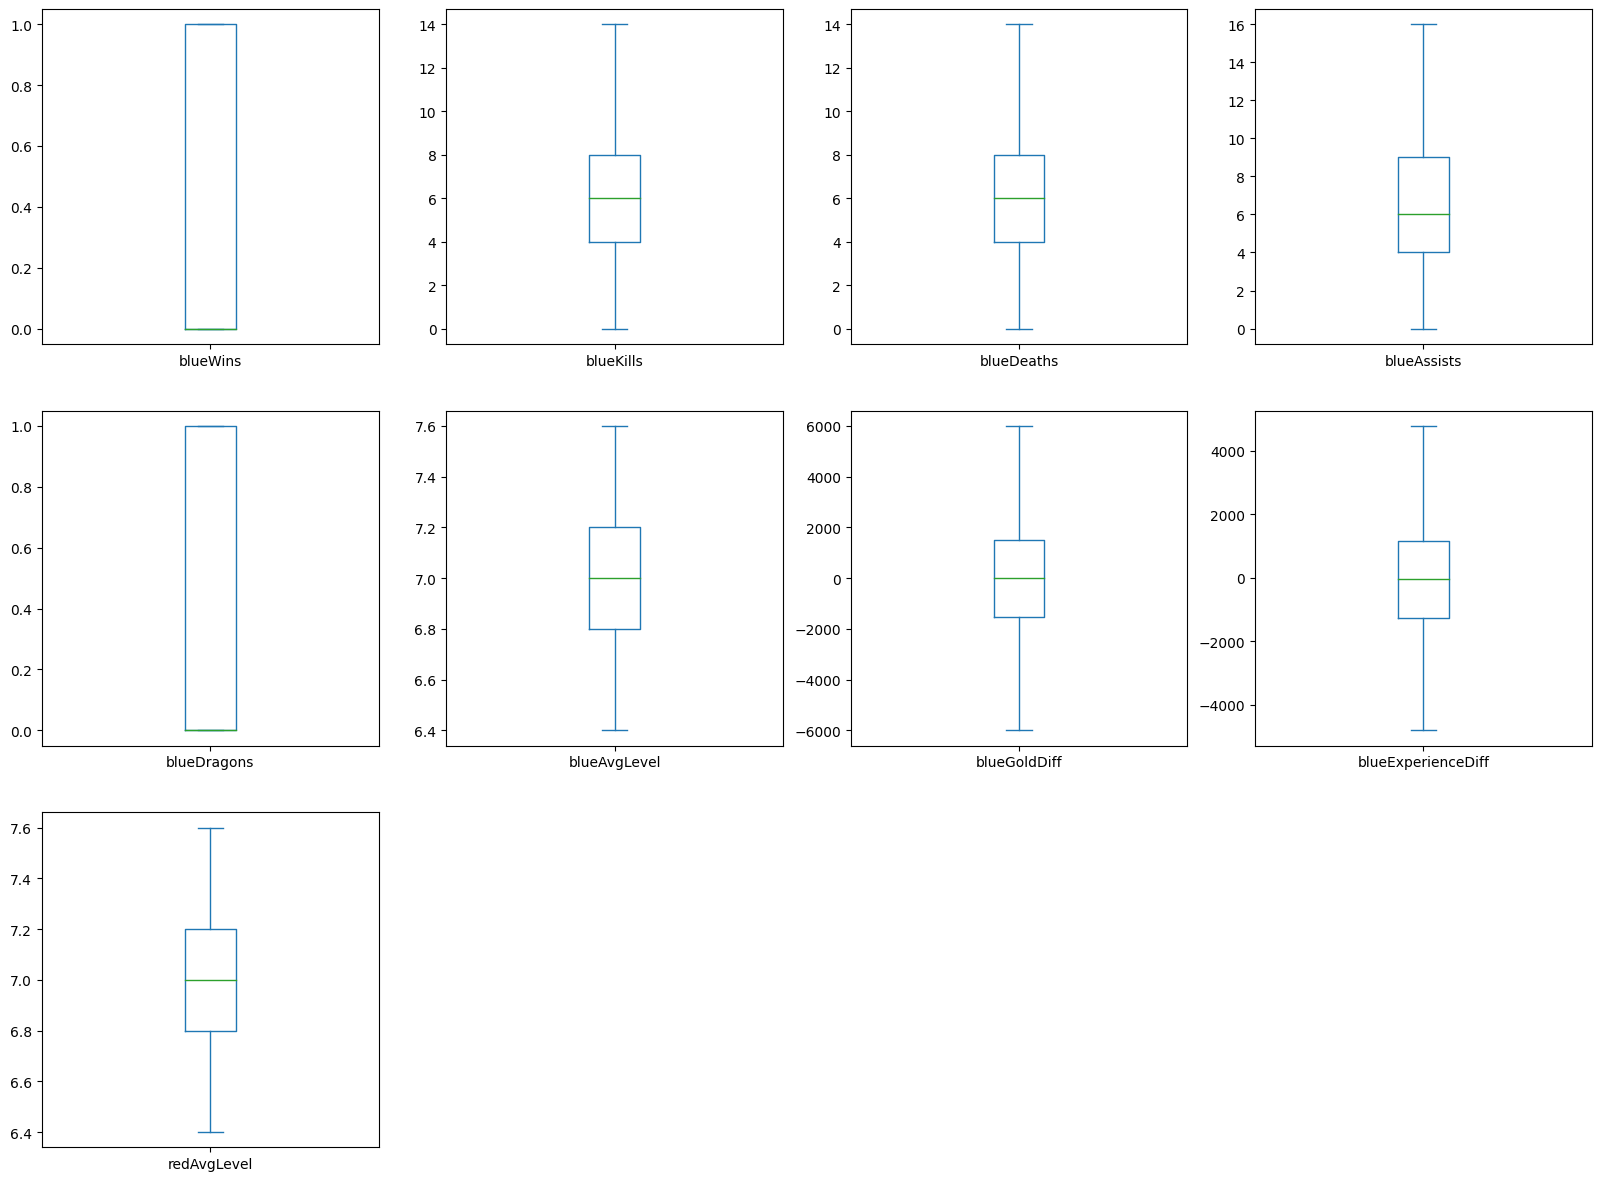

In [131]:
data_clean.plot(kind = "box", subplots = True, layout = (4, 4), figsize = (20, 20))

# ML Model

In [133]:
X = data_clean.drop("blueWins", axis = 1)
y = data_clean["blueWins"]

In [134]:
#train test split

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size = 0.2, random_state = 0, stratify = y)

In [135]:
print(X_train.shape, y_train.shape)
print(X_test.shape, y_test.shape)

(7903, 8) (7903,)
(1976, 8) (1976,)


In [136]:
#applying standard scaler
scaling = StandardScaler()
X_train_scaled = scaling.fit_transform(X_train)
X_test_scaled = scaling.transform(X_test)

In [137]:
#modelling
def model_train_test(model):
    model.fit(X_train_scaled, y_train)
    y_predict = model.predict(X_test_scaled)
    print(classification_report(y_test, y_predict))
    ConfusionMatrixDisplay.from_estimator(model, X_test_scaled, y_test)

### K-nearest Neighbours

              precision    recall  f1-score   support

           0       0.69      0.75      0.72       990
           1       0.73      0.66      0.69       986

    accuracy                           0.71      1976
   macro avg       0.71      0.71      0.71      1976
weighted avg       0.71      0.71      0.71      1976



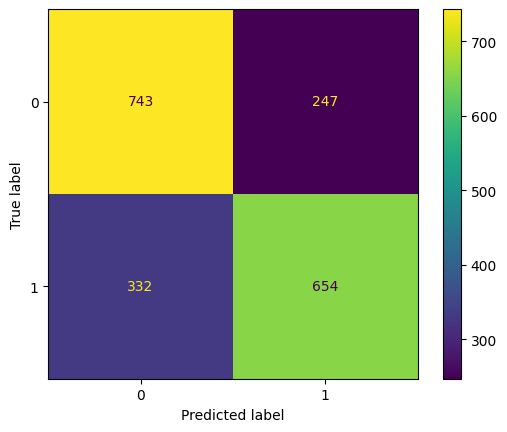

In [138]:
knn = KNeighborsClassifier(n_neighbors = 10)

model_train_test(knn)

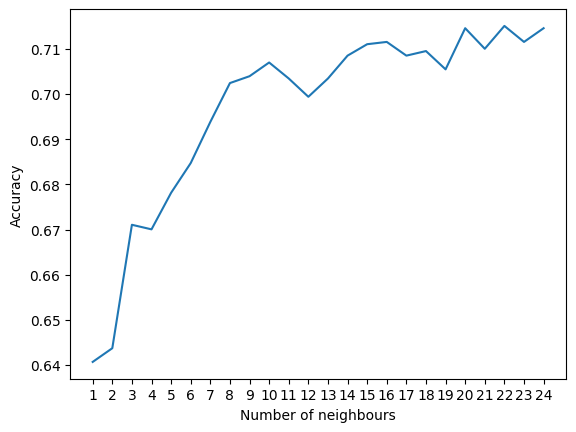

Maximum accuracy of K-Nearest Neighbours is 71.51% with number of neighbours set to 22 neighbours.


In [139]:
max_accuracies = {}
score = []
for i in range(1, 25):
    knn = KNeighborsClassifier(n_neighbors = i)
    knn.fit(X_train_scaled, y_train)
    score.append(knn.score(X_test_scaled, y_test))
    
plt.pyplot.plot(range(1, 25), score)
plt.pyplot.xticks(np.arange(1, 25, 1))
plt.pyplot.xlabel("Number of neighbours")
plt.pyplot.ylabel("Accuracy")
plt.pyplot.show()

max_accuracy = max(score) * 100
max_accuracies["KNN"] = max_accuracy
max_accuracy_K = score.index(max(score)) + 1

print("Maximum accuracy of K-Nearest Neighbours is {:.2f}%".format(max_accuracies["KNN"]),"with number of neighbours set to",max_accuracy_K,"neighbours.")

              precision    recall  f1-score   support

           0       0.71      0.73      0.72       990
           1       0.72      0.70      0.71       986

    accuracy                           0.72      1976
   macro avg       0.72      0.72      0.71      1976
weighted avg       0.72      0.72      0.72      1976



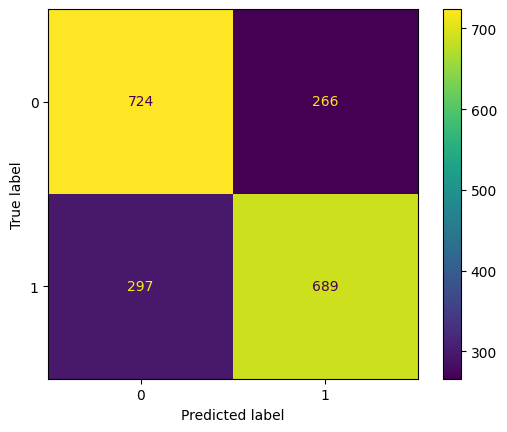

In [140]:
knn = KNeighborsClassifier(n_neighbors = max_accuracy_K)

model_train_test(knn)

## MODEL COMPARISON 

Models compared to : KNN , LR , DT, RF, NB, SVM

In [141]:
algorithm = ["K-Nearest Neighbour", "Logistic Regression", "Decision Tree", "Random Forest", "Naive Bayes", "Support Vector Machine"]
classifiers = [KNeighborsClassifier(n_neighbors = max_accuracy_K), LogisticRegression(), DecisionTreeClassifier(), RandomForestClassifier(), naive_bayes.GaussianNB(), svm.SVC(kernel = "linear")]

result = []

for c in classifiers:
    c.fit(X_train_scaled, y_train)
    y_predict = c.predict(X_test_scaled)
    accuracy = accuracy_score(y_test, y_predict)
    result.append(accuracy)
result_lol_predict = pd.DataFrame(result, index = algorithm)
result_lol_predict.columns = ["Algorithm accuracy"]
result_lol_predict.sort_values(by = "Algorithm accuracy", ascending = False)

,Algorithm accuracy
Logistic Regression,0.722166
Support Vector Machine,0.721154
Naive Bayes,0.716093
K-Nearest Neighbour,0.715081
Random Forest,0.713563
Decision Tree,0.636640


Average is around 71%, best is 72.2% by logistic regression ,decision tree is not so good

Lets use Logistic Regression

              precision    recall  f1-score   support

           0       0.73      0.71      0.72       990
           1       0.72      0.73      0.72       986

    accuracy                           0.72      1976
   macro avg       0.72      0.72      0.72      1976
weighted avg       0.72      0.72      0.72      1976



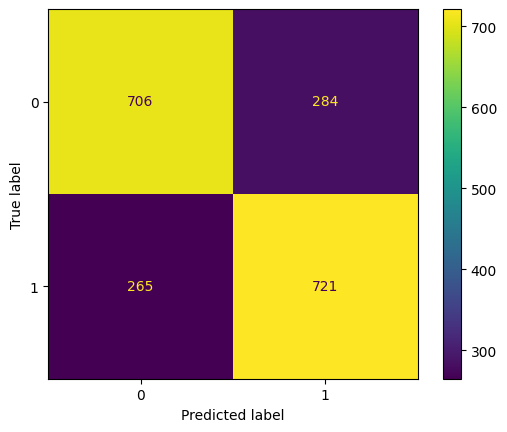

In [142]:
model_train_test(LogisticRegression())

With this model we can predict which team would win after just 10 mins of play in a high elo game in league of legends. Gold difference and Experience DIFF plays the highest role according to our data.